In [21]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt 
from keras.layers import Dense
from keras.regularizers import l2

In [22]:
from keras.models import Sequential

In [23]:
from keras.layers.recurrent import LSTM
from keras.layers import Dense

In [24]:
data_std = pd.read_csv("data/final/1min/BidAsk/BTC_std.csv")
Y = pd.read_csv("data/final/1min/BTC_Y_std.csv")

def CreateData_LSTM(data_std, Y):
    r,x = data_std.shape
    data = data_std.values.reshape((1, r, x))
    Y_std = Y.values.reshape((1,r,1))
    
    train_lstm = data[:,:14000,:]
    #val_lstm = data[:,14000:15500,:]
    val_lstm = data[:,:15500,:]
    #test_lstm = data[:,15500:,:]
    test_lstm = data[:,:,:]
    
    Y_train_lstm = Y_std[:,:14000,:]
    #Y_val_lstm = Y_std[:,14000:15500,:]
    Y_val_lstm = Y_std[:,:15500,:]
    #Y_test_lstm = Y_std[:,15500:,:]
    Y_test_lstm = Y_std[:,:,:]
    
    

In [26]:
def LSTM_Model_1(train_lstm, Y_train_lstm, val_lstm, Y_val_lstm, x, EP = 25):
    model = Sequential()
    model.add(LSTM(16, input_shape=(None, x), return_sequences = True))
    #model.add(LSTM(8, return_sequences = True))
    #model.add(LSTM(4, return_sequences = True))
    #model.add(Dense(32, activation = "relu"))
    #model.add(Dense(16, activation = "relu"))
    #model.add(Dense(8, activation = "relu"))
    #model.add(Dense(4, activation = "relu"))
    model.add(Dense(3, activation = "softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    history = model.fit(train_lstm, Y_train_lstm, epochs=25, validation_data = (val_lstm, Y_val_lstm))
    

In [433]:
Y_std[:,1,:] 

array([[1]])

In [326]:
val_weight.shape

(1, 15500, 1)

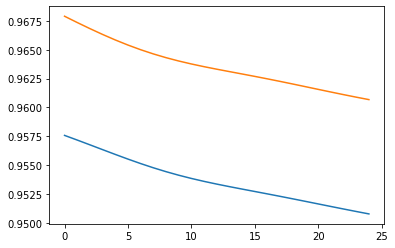

In [485]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [315]:
model.predict_classes(test_lstm)

/Users/martin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0, 0, 0, ..., 0, 0, 0]])

In [486]:
pred = np.argmax(model.predict(test_lstm), axis=-1)

In [475]:
pred.shape

(1, 17048)

In [476]:
pred[0,15500:]

array([0, 0, 0, ..., 0, 0, 0])

In [477]:
pred[0,15500:] = Y_std[15500:]

ValueError: could not broadcast input array from shape (0,17048,1) into shape (1548)

In [27]:
.shape

(1, 17048, 1)

In [487]:
sum(pred[0,15500:] == Y_std[0,15500:,0])/1548

0.3785529715762274

In [482]:
pred[0,15500:].shape

(1548,)

In [488]:
model.predict(test_lstm)

array([[[0.3019536 , 0.30216908, 0.39587733],
        [0.3249775 , 0.3002733 , 0.37474924],
        [0.36323813, 0.2354124 , 0.40134948],
        ...,
        [0.47215974, 0.2899163 , 0.23792394],
        [0.5255605 , 0.2540053 , 0.22043416],
        [0.53964335, 0.27854082, 0.18181585]]], dtype=float32)

In [318]:
model.predict_classes(test_lstm)

array([[0, 0, 0, ..., 0, 0, 0]])

In [247]:
Y_test_lstm[:,1:10,:]

array([[[2],
        [2],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [1]]])

In [280]:
pred = np.argmax(model.predict(test_lstm), axis=-1)

In [489]:
pred = model.predict(test_lstm)

In [281]:
pred

array([[0, 0, 0, ..., 0, 0, 0]])

In [258]:
pred[0,:]

array([0, 0, 0, ..., 0, 0, 0])

In [282]:
np.bincount(pred[0,:])

array([1308])

In [263]:
pred.shape

(1, 1308)

In [262]:
np.nonzero(pred[0,:])

(array([], dtype=int64),)

In [491]:
import sklearn
from sklearn.metrics import roc_auc_score

In [502]:
pred.shape

(1, 17048, 3)

In [506]:
pred[:,15500:,:].reshape((1548,3))

array([[0.5524039 , 0.23740539, 0.21019068],
       [0.5160029 , 0.22005287, 0.2639443 ],
       [0.44032782, 0.2586724 , 0.3009998 ],
       ...,
       [0.47215974, 0.2899163 , 0.23792394],
       [0.5255605 , 0.2540053 , 0.22043416],
       [0.53964335, 0.27854082, 0.18181585]], dtype=float32)

In [505]:
pred[:,15500,:]

array([[0.5524039 , 0.23740539, 0.21019068]], dtype=float32)

In [507]:
roc_auc_score(pd.get_dummies(Y_std[:,15500:,:].reshape(1548)), pred[:,15500:,:].reshape((1548,3)), multi_class="ovo")

0.555808694724654

In [496]:
Y_std.shape

(1, 17048, 1)